<a href="https://colab.research.google.com/github/sulei7901/PythonProject1/blob/master/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Project 1

**Import Libraries**

In [58]:
#!pip install pandas
#!pip install matplotlib
%matplotlib inline

import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt



**Clean Data and Import Data**

In [76]:
## clean data to change missing values to NaN
missing_values = ['na','s']
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', na_values = missing_values)
#df

**Select School and Exam**

Bronx High School of Science and Living Environment exam




In [92]:
## Print a list of all schools
#unique_values=(np.unique(df['School Name']))
#np.set_printoptions(threshold=sys.maxsize)
#print(unique_values)

#School DBN 
#Bronx High school of Science = 10X445

## filter for a school #BxSci and an exam #Liv Env
df2=df[(df['School DBN']== '10X445') & (df['Regents Exam']=='Living Environment')]
#df2

**Insights for Bronx High School of Science and Living Environment exam**

1. BxSci had its highest mean score in Living Environment exam in 2015.
2. BxSci had its highest median test score in Living Environment exam in 2015.
3. BxSci had the greatest # of students taking the Living Environment exam in 2015.



Bronx Science Mean Scores
Year
2015    93.418182
2016    92.880000
2017    92.525000
Name: Mean Score, dtype: float64

Bronx Science Median Scores
Year
2015    93.50
2016    92.85
2017    92.50
Name: Mean Score, dtype: float64

Bronx Science Total Tested
Year
2015    2870
2016    2400
2017    2220
Name: Total Tested, dtype: int64

Barplot shows that BxSci had its highest mean score in Living Environment exam in 2015.


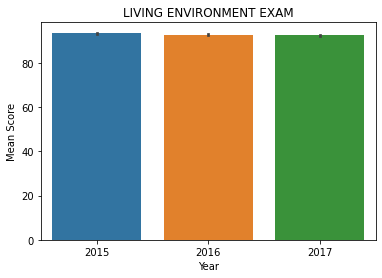

Barplot shows BxSci had its highest median test score in Living Environment exam in 2015.
AxesSubplot(0.125,0.125;0.775x0.755)


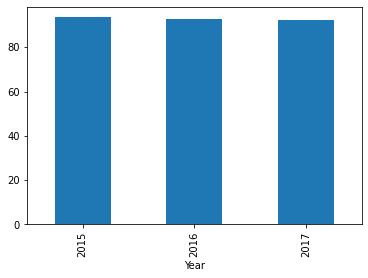

Barplot shows BxSci had the greatest # of students taking the Living Environment exam in 2015.
AxesSubplot(0.125,0.125;0.775x0.755)


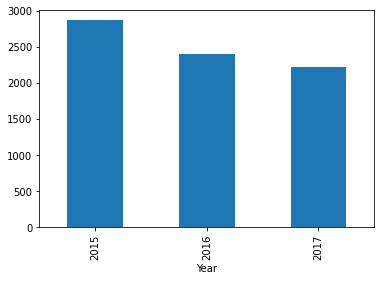

In [107]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Groupbys
df3=df2.groupby(['Year'])['Mean Score'].mean()
print('Bronx Science Mean Scores')
print(df3)
print('')

df4=df2.groupby(['Year'])['Mean Score'].median()
print('Bronx Science Median Scores')
print(df4)
print('')

df5=df2.groupby(['Year'])['Total Tested'].sum()
print('Bronx Science Total Tested')
print(df5)
print('')

# Visual - Barplot shows that BxSci had its highest mean score in Living Environment exam in 2015
print(color.BLUE + color.BOLD + 'Barplot shows that BxSci had its highest mean score in Living Environment exam in 2015.' + color.END)
sns.barplot(x='Year', y='Mean Score', data=df2).set_title('LIVING ENVIRONMENT EXAM')
plt.show()

# Visual - Barplot shows BxSci had its highest median test score in Living Environment exam in 2015
print(color.BLUE + color.BOLD + 'Barplot shows BxSci had its highest median test score in Living Environment exam in 2015.' + color.END)
medians=df2.groupby(['Year'])['Mean Score'].median().plot(kind='bar')
print(medians)
plt.show()

# Visual - Barplot shows BxSci had the greatest # of students taking the Living Environment exam in 2015
print(color.BLUE + color.BOLD + 'Barplot shows BxSci had the greatest # of students taking the Living Environment exam in 2015.' + color.END)
sums=df2.groupby(['Year'])['Total Tested'].sum().plot(kind='bar')
print(sums)
plt.show()

**Compare the Original 3 Specialized High Schools**

*   Stuyvesant High School had the highest, Bronx Science had the second highest and Brooklyn Tech had the lowest of the 3 schools for the three years of the Lvining Environment exam.







Text(0.5, 1.0, 'LIVING ENVIRONMENT EXAM')

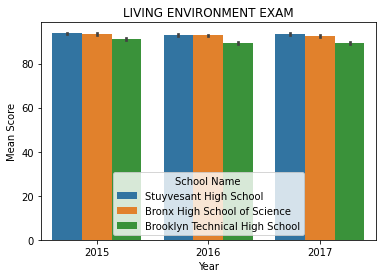

In [71]:
### Compare Stuy, BxSci, BkTech (Original 3 Specialized High Schools)
#School DNB
#Bronx High school of Science = 10X445
#Stuyvesant High School = 02M475
#Brooklyn Technical High School = 13K430
specialschools = ['10X445', '02M475', '13K430']
df6=df[(df['Regents Exam']=='Living Environment') & df['School DBN'].isin(specialschools)]
df7=df6.groupby(['School Name','Year'])['Mean Score'].mean()
#print(df7)
# Visual - Barplot shows Stuy had the highest, BxSci had second highest, and BkTech had lowest avg scores for 3 years of Liv Envir exam
sns.barplot(x='Year',y='Mean Score',data=df6, hue='School Name').set_title('LIVING ENVIRONMENT EXAM')


**Compare Bronx Science to Other Schools in City**

*   Barplot shows BxSci scored higher than the average of all other schools for 3 years on the Living Environment exam.

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Text(0.5, 1.0, 'LIVING ENVIRONMENT EXAM')

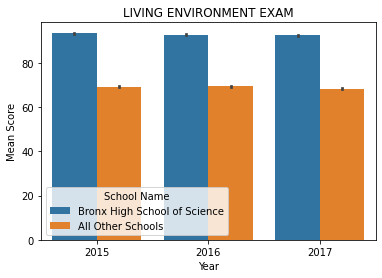

In [89]:
## All schools expect for BxSci that took Liv Envir exam
AllSchoolsExcept=df[(df['School DBN'] != '10X445') & (df['Regents Exam']=='Living Environment')]
AllSchoolsExcept.iloc[:,1] = 'All Other Schools'
#AllSchoolsExcept
#AllSchoolsExceptMean=AllSchoolsExcept.groupby(['Year','School Name'])['Mean Score'].mean()
#print(AllSchoolsExceptMean)

## Append Other Schools to BxSci
result = df2.append(AllSchoolsExcept)
#result
# Visual - Barplot shows Bronx High School of Science scored higher than the average of all other schools for 3 years on the Living Environment exam
sns.barplot(x='Year',y='Mean Score',data=result, hue='School Name').set_title('LIVING ENVIRONMENT EXAM')